Main purpose of using is that reducing the overfitting 

In [80]:
from sklearn.datasets import load_breast_cancer

In [81]:
data=load_breast_cancer()

In [82]:
import pandas as pd 

In [83]:
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.DataFrame(data.target,columns=["target"])

In [84]:
dataset.shape

(569, 31)

In [85]:
dataset=pd.concat((x,y),axis=1)
dataset.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [86]:
dataset.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [200]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

<h3>Decision Tree </h3>

In [201]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)

DecisionTreeClassifier()

In [202]:
dtr.score(x_train,y_train)

1.0

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(4, 3))
plot_tree(dtr, filled=True)
plt.title("Decision Tree ")
plt.show()

In [ ]:
y_pred=dtr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

<h3>Bagging classifier with decision tree</h3>

In [ ]:
from sklearn.ensemble import BaggingClassifier


In [ ]:
b=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=25,random_state=42)

In [ ]:
b.fit(x_train,y_train)

In [192]:
b.score(x_train,y_train)

0.9384615384615385

In [193]:
tree = b.estimators_[0]  # Get the first decision tree
tree

DecisionTreeClassifier(random_state=1952926171)

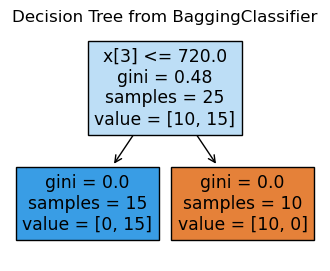

In [194]:


from sklearn.tree import plot_tree
plt.figure(figsize=(4, 3))
plot_tree(tree, filled=True)
plt.title("Decision Tree from BaggingClassifier")
plt.show()

In [195]:
y_predict=b.predict(x_test)

In [196]:
accuracy_score(y_test,y_predict)

0.9385964912280702

<h4>Comapre accuarcy with descion tree and  bagging descion tree classifer </h4>

In [197]:
print ("Decision tree accuaracy score ")
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

Decision tree accuaracy score 


0.9298245614035088

In [198]:
print("bagging using decision  tree classifer accuracy score  ")
accuracy_score(y_test,y_predict)

bagging using decision  tree classifer accuracy score  


0.9385964912280702